# Plotting with seaborn en matplotlib

In this notebook we will analyze two Pokémon data files with seaborn and matplotlib.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon = pd.read_csv("pokemon_small.csv")
pokemonx = pd.read_csv("pokemon_extended.csv", index_col='name')
summary = pokemonx[["abilities", "pokedex_number", "type1", "type2", "generation"]]
summary

,abilities,pokedex_number,type1,type2,generation
name,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1,grass,poison,1
Ivysaur,"['Overgrow', 'Chlorophyll']",2,grass,poison,1
Venusaur,"['Overgrow', 'Chlorophyll']",3,grass,poison,1
Charmander,"['Blaze', 'Solar Power']",4,fire,NaN,1
Charmeleon,"['Blaze', 'Solar Power']",5,fire,NaN,1
...,...,...,...,...,...
Celesteela,['Beast Boost'],797,steel,flying,7
Kartana,['Beast Boost'],798,grass,steel,7
Guzzlord,['Beast Boost'],799,dark,dragon,7


## The importance of choosing the right presentation

We will make two plots showing the average attack per generation, using seaborn.


<AxesSubplot:xlabel='generation', ylabel='attack'>

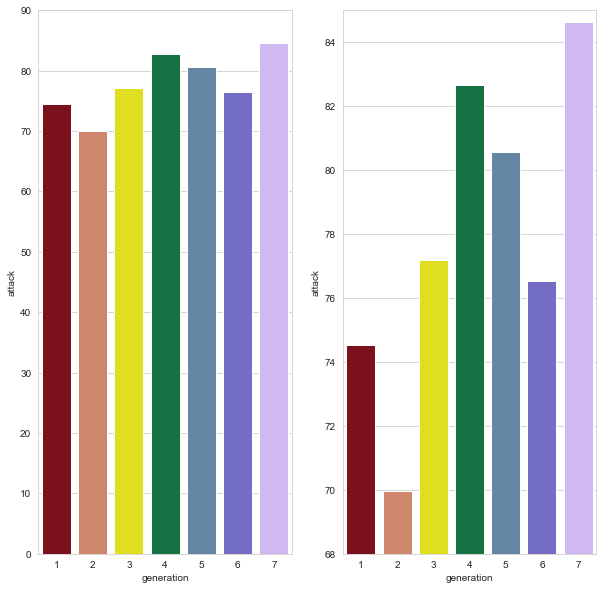

In [27]:
import seaborn as sns
sns.set_style('whitegrid')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.set_ylim(0, 90)
ax2.set_ylim(68, 85)
colors=["xkcd:crimson", "xkcd:dark peach", "xkcd:bright yellow", "xkcd:jungle green", 
        "xkcd:dusty blue", "xkcd:dark periwinkle", "xkcd:pale violet"]
sns.barplot(x='generation', y='attack', data=pokemonx, ax=ax1, ci=None,
           palette = colors)
sns.barplot(x='generation', y='attack', data=pokemonx, ax=ax2, ci=None,
           palette = colors)

We usded the same data for both graphs. However, in the right graph we moved the y-axis from 68 to 85, which makes it looks like the Pokémon in generation 2 have a very low attack compared to the rest. In the left graph, from 0 to 90, you can see that the difference is not so big. 

## Two in one

We'll make two plots - one with the number of Pokémon per type 1, one with the number of Pokémon per type 2. We'll place them in the same figure. I'll start by making two subsets, one each for type 1 and type 2. 

In [3]:
type1rank = pokemonx.type1.value_counts(ascending=False)
type2rank = pokemonx.type2.value_counts(ascending=False)


Now I will make the graph.

<AxesSubplot:xlabel='type2', ylabel='count'>

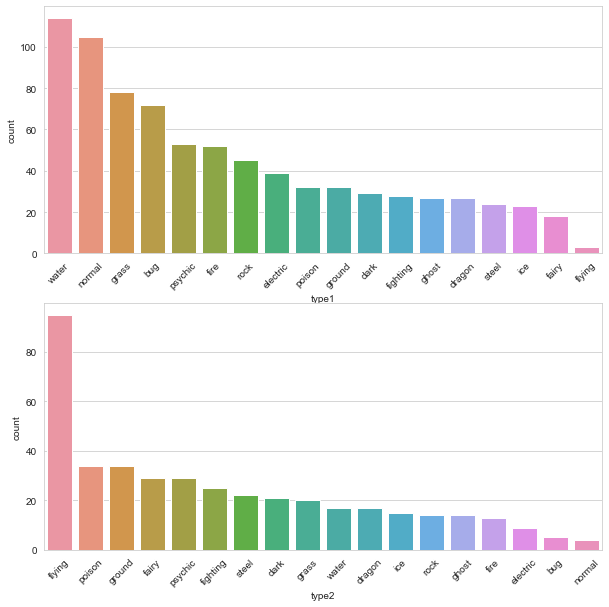

In [4]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
sns.countplot(x = "type1", data = pokemonx, order=type1rank.index, ax=ax1)
sns.countplot(x = "type2", data = pokemonx, order=type2rank.index, ax=ax2)

## Pie chart

Here, I will make a pie chart to see the ratio between Pokémon types. We'll do it for the type 1 of the Pokémon. 

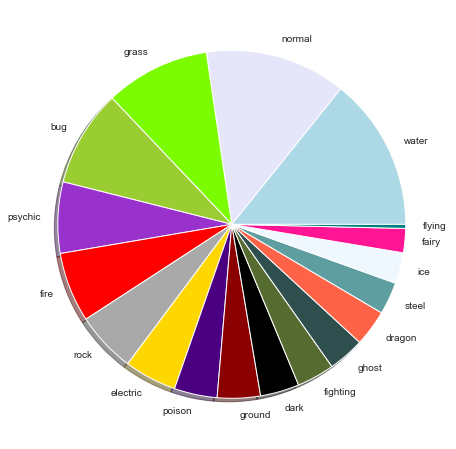

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ["LightBlue", "Lavender","LawnGreen","YellowGreen","DarkOrchid","Red","DarkGray","Gold","Indigo","DarkRed",
        "Black","DarkOliveGreen","DarkSlateGray","Tomato","CadetBlue","AliceBlue", "DeepPink", "Teal"]
plt.pie(type1rank, labels=type1rank.index, colors = colors, shadow = True)
plt.show()

## Line plot

We will use the larger data set (pokemonx) to make a line plot. This set has all Pokémon up to and including generation 7. I was given a statement that for each generation, the Pokémon are becoming less original, bigger and less subtle and asked to either prove or disprove it. This dataset includes the weight and length of Pokémon, so we can check the final two claims. 
We'll make line graphs showing the average weight and length per generation. First, we'll make two subsets for those stats. 

In [6]:
avweight = pokemonx[["weight_kg", "generation"]].groupby("generation").mean()
avheight = pokemonx[["height_m", "generation"]].groupby("generation").mean()

Now, we'll make lineplots. We start with the generation on the x-axis and average weight on the y-axis.

<AxesSubplot:xlabel='generation', ylabel='weight_kg'>

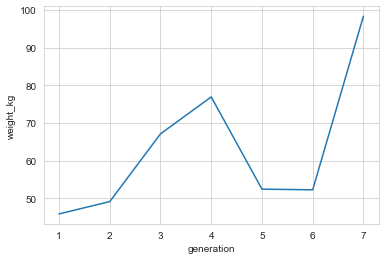

In [7]:
sns.lineplot(x="generation", y="weight_kg", data=avweight)

It looks like there is no upwards trend in weight, because generations 5 and 6 break it, being lower in weight than 3 and 4. It is however correct that generations 1 and 2 were on average lighter than all generations following it, and that generation 7 was the heighest in weight. 

Now we will look at the length.

<AxesSubplot:xlabel='generation', ylabel='height_m'>

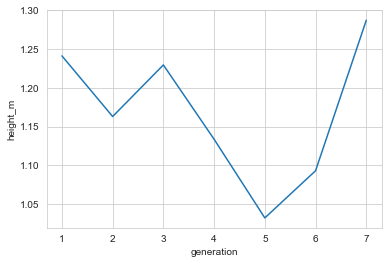

In [8]:
sns.lineplot(x="generation", y="height_m", data=avheight)

As for length, the claim seems even more off: Pokémon clearly do not become taller each generation. 

## Violin plots

Here, we will use violin plots to help check another claim:
`For Pokémon with water, fire or grass as type 1 it can be said that Pokémon of a higher evolution-stage on average have higher total scores. For Pokémon with bug as type 1 there is hardly a difference between evolutions.`
To check this, we will have to filter our data-set so that only water, fire, grass and bug Pokémon remain. We will also only check stages 1 and 2, because there is not enough data from stage 3 to create an accurate representation.

In [ ]:
#water, fire, grass, bug becomes wfgb
wfgb_pokemon = pokemon[pokemon["Type 1"].isin(["Water", "Fire", "Grass", "Bug"]) & pokemon["Stage"].isin([1, 2])]

: 

Now we will make a violiin plot, with Type 1 on the x-axis and Total on the y-axis. 

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

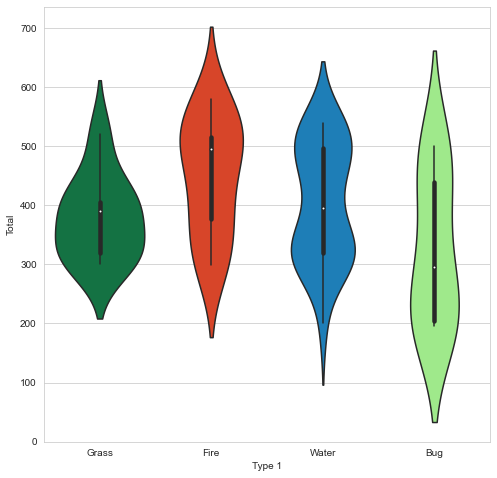

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x="Type 1", y="Total", data=wfgb_pokemon, ax=ax,
               palette=["xkcd:jungle green", "xkcd:vermillion", "xkcd:cerulean", "xkcd:light green"])

We can see the divison per type of Pokémon. We however want to see if there is, for each type except bug, a difference in stage.

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

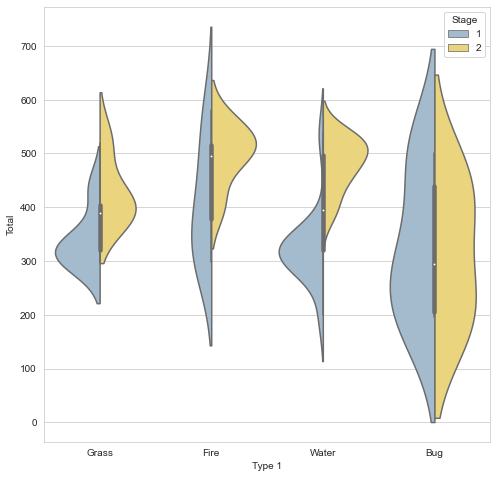

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x="Type 1", y="Total", data=wfgb_pokemon, ax=ax, 
               hue="Stage", split=True,
               palette=["xkcd:light grey blue", "xkcd:pale gold"])

The claim seems to be correct! For each type except bug the total values in stage two are on average higher than stage one. We'll however check for the amount of data per type, so that we do not draw any unbased conclusions. 

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

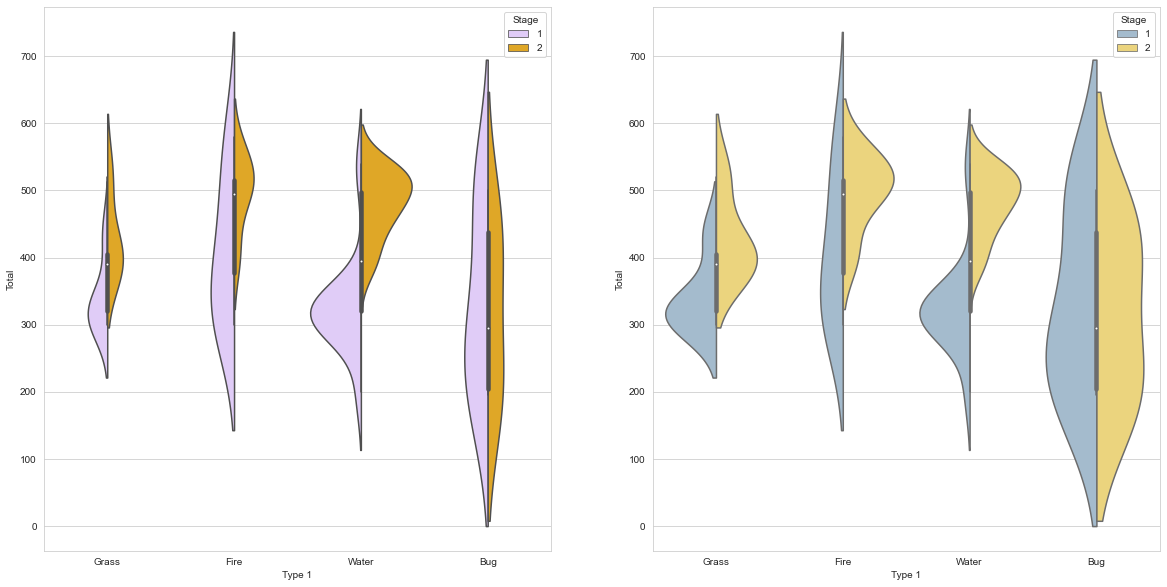

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.violinplot(x="Type 1", y="Total", data=wfgb_pokemon, 
               hue="Stage", split=True, ax=ax[0],
               scale="count", scale_hue=False,
               palette=["xkcd:light lavender", "xkcd:amber"])
sns.violinplot(x="Type 1", y="Total", data=wfgb_pokemon, ax=ax[1], 
               hue="Stage", split=True,
               palette=["xkcd:light grey blue", "xkcd:pale gold"])

Left is the graph scaled to the amount of data points. Right is the original graph. 

To go back to the claim: it still looks like all types except bug have higher stats in higher stages. 

Still, the amount of data points do seem to have an influence. In the new graph we see that mostly Grass and Bug become very thinly spread, and that in stage 2 for Fire there are not as many data points. Only water seems to be mostly unaltered by this filter. 

We'll plot the amount of data points in the plots to get an even better view behind the scenes. 

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

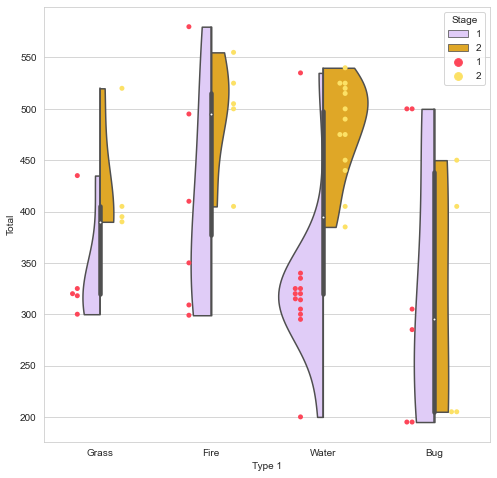

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x="Type 1", y="Total", data=wfgb_pokemon, ax=ax, 
               hue="Stage", split=True, cut=0,
               scale="count", scale_hue=False,
               palette=["xkcd:light lavender", "xkcd:amber"])
sns.swarmplot(data=wfgb_pokemon, x='Type 1', y='Total', 
              hue='Stage', dodge=True, 
              palette=['xkcd:watermelon', "xkcd:sand yellow"])

Here we can see there is a very small amount of points forming these plots. It might look like there is or is no correlation between Stage and Total, but in truth it might be the opposite. Conclusion: with a limited amount of data, violin plots might give a skewed view of reality. 

## Boxplots

We will use boxplots to take a look at the distribution of the total statistics per evolution-stage. We'll answer the following questions: 
* Do all Pokémon in Stage 3 have higher stats than the bottom 75% of Pokémon in Stage 1? 
* Is the median of Total Stats for Stage 3 higher than the 75th percentile of Pokémon of Stage 2?
* Are Legendary Pokémon responsible for the shift of the boxplot of Stage 1 and the outliers of Total Stats in this category?

We'll make a boxplot with Stage on the x-axis and Total on the y-axis. 

<AxesSubplot:xlabel='Stage', ylabel='Total'>

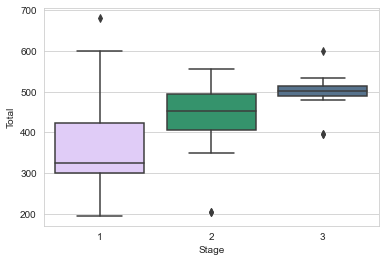

In [14]:
sns.boxplot(x="Stage", y="Total", data=pokemon, palette=["xkcd:light lavender", "xkcd:teal green", "xkcd:cadet blue"])

We can see that the minimum of the boxplot of Stage 3 is above the third quartile of the boxplot of Stage 1. The question we wanted to answer however is if all Pokémon of Stage 3 have higher total stats than the bottom 75% of the Pokémon in stage 1. The answer is no, since there are outliers in Stage 3 that fall in the third quartile of stage 1. 

### Challenge: find the outliers

The limits of a boxplot are set as follows: 

`Upper boundary = Third quartile + (1.5 * IQR)`
`Lower boundary = First quartile — (1.5 * IQR)`

IQR is the *interquartile range*, which means it's Q3 - Q1.
We'll have to find the values of Q1 and Q3. 

In [15]:
pokemon.groupby("Stage").Total.describe().unstack()

       Stage
count  1         79.000000
       2         56.000000
       3         16.000000
mean   1        360.734177
       2        446.660714
       3        497.375000
std    1        101.885268
       2         68.663415
       3         48.622183
min    1        195.000000
       2        205.000000
       3        395.000000
25%    1        300.000000
       2        405.000000
       3        490.000000
50%    1        325.000000
       2        452.500000
       3        502.500000
75%    1        422.500000
       2        495.000000
       3        513.750000
max    1        680.000000
       2        555.000000
       3        600.000000
dtype: float64

We can see that for Stage 3 the Q1 value is 490 and the Q3 value is 513.75. This means that we can now find the IQR, and calculate the Upper and Lower boundaries. 

In [16]:
Q1 = 490
Q3 = 513.75
IQR = Q3 - Q1 
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print(f"The upper boundary is {upper_bound}. The lower boundary is {lower_bound}.")

De upper boundary is 549.375. De lower boundary is 454.375.


Now that we have the borders, we can find the Pokémon in Stage 3 with a Total below 454.375, or above 549.375. 

In [17]:
outliers_3 = pokemon[(pokemon["Stage"] == 3) & ((pokemon["Total"] < 454.375) | (pokemon["Total"] > 549.375))]
outliers_3

,Unnamed: 0,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,3,False
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


We can see that the outlying Stage 3 Pokémon are Butterfree and Beedrill (with Totals of 395) and Dragonite (Total 600).
Butterfree and Beedrill don't have, as the only Stage 3 Pokémon, higher Totals than the bottom 75% of stage 1 Pokémon.

### On with the boxplots

The next question is if the median of Stage 3 is higher than the 75th percentile of Pokémon in Stage 2. Looking back at our boxplot the answer is obviously 'yes'. 

The last question, about influence of legendary Pokémon, requires a new boxplot: one distinguishing legendary from non-legendary Pokémon in stage 1. We'll make the boxplot. 

<AxesSubplot:xlabel='Stage', ylabel='Total'>

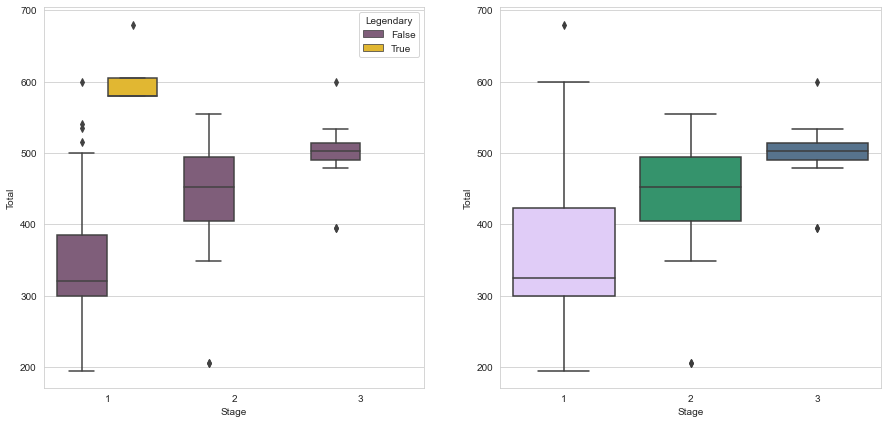

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

sns.boxplot(x="Stage", y="Total", data=pokemon,
            hue="Legendary", ax=ax[0],
            palette=["xkcd:dull purple", "xkcd:golden yellow"])

sns.boxplot(x="Stage", y="Total", data=pokemon, 
            ax = ax[1], 
            palette=["xkcd:light lavender", "xkcd:teal green", "xkcd:cadet blue"])

The left graph shows the distinction between legendary and non-legendary. The right graph is the old boxplot for comparison. 
It's obvious that before, the Stage 1 boxplot reached over 400 with it's third quartile and 600 with its fourth. However, when we take out the legendary Pokémon, the third quartile no longer reaches 400 and the fourth quartile only reaches 500. 
If we would answer the first question again, the answer would be that all Pokémon from stage 3 have a higher total than the bottom 75% of Stage 1, correcting for legendary Pokémon.

## Scatterplot

We'll make a scatterplot to see the correlation between various filters. We'll start with Attack on the x-axis and HP on the y-axis. 

<AxesSubplot:xlabel='Attack', ylabel='HP'>

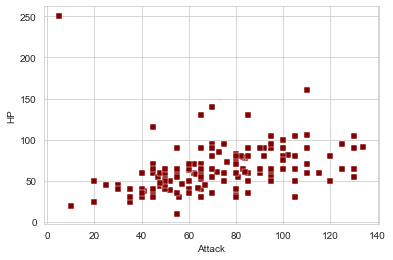

In [19]:
sns.scatterplot(x="Attack", y="HP", data=pokemon, color="xkcd:dark red", marker="s")

We want to check if Pokémon with higher attacks also have higher HP's. There is a light upward trend, so, even though it's not extremely convincing, this statement seems to be correct. 
Next we want to check if Pokémon with higher attacks are also faster. 

<AxesSubplot:xlabel='Attack', ylabel='Speed'>

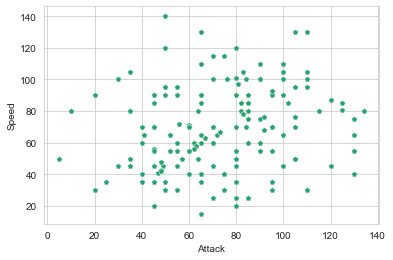

In [20]:
sns.scatterplot(x="Attack", y="Speed", data=pokemon, color="xkcd:teal green", marker="p")

We do not see a strong correlation in this graph. 

Next, we want to check some other correlations. First, to see if the stage (evolution) correlates to HP, speed and attack. We will add 'stage' as a factor in the above two plots, first the one with attack.

<AxesSubplot:xlabel='Attack', ylabel='HP'>

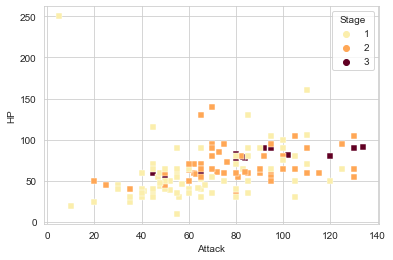

In [21]:
sns.scatterplot(x="Attack", y="HP", hue="Stage", data=pokemon, 
                palette=["xkcd:light tan", "xkcd:pale orange", "xkcd:burgundy"], 
                marker="s")

It seems that the higher the stage, the higher the HP and attack of a Pokémon.

<AxesSubplot:xlabel='Attack', ylabel='Speed'>

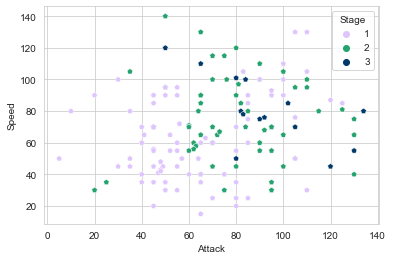

In [22]:
sns.scatterplot(x="Attack", y="Speed", hue="Stage", data=pokemon, 
                palette=["xkcd:light lavender", "xkcd:teal green", "xkcd:marine blue"], 
                marker="p")

Pokémon in stage 1 seem to, on average, have lower attacks and speeds than Pokémon in stage 2 and 3. There is no clear difference between stages 2 and 3. 

## Histogram

We'll make a histogram to analyze the HP of a set of Pokémon. First we will let seaborn determine how to distribute the Pokémon.

<AxesSubplot:xlabel='HP', ylabel='Count'>

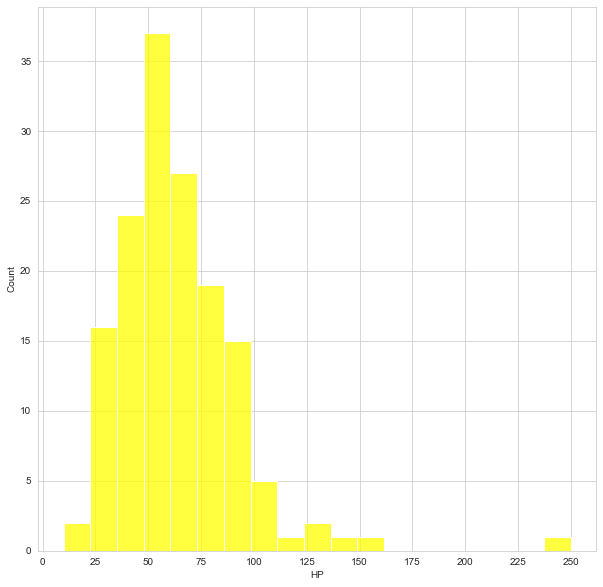

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(range(0,251,25))
sns.histplot(pokemon.HP, ax = ax, color = "yellow")

In the second graph (brown) we will set the bin number to 35. 


<AxesSubplot:xlabel='HP', ylabel='Count'>

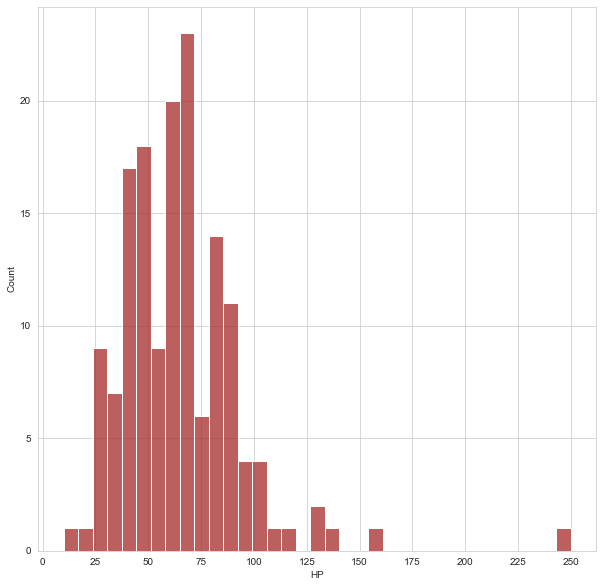

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(range(0,251,25))
sns.histplot(pokemon.HP, ax = ax, bins = 35, color = "brown")

To really show the difference, we will plot them in the same figure. 

<AxesSubplot:xlabel='HP', ylabel='Count'>

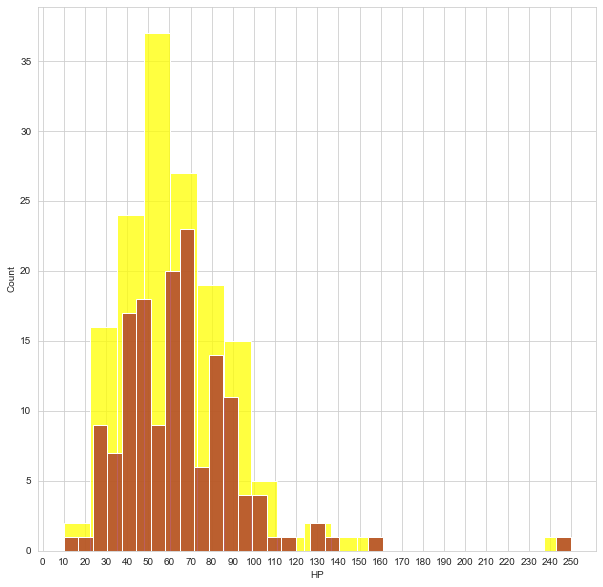

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(range(0,251,10))
sns.histplot(pokemon.HP, ax = ax, color = "yellow")
sns.histplot(pokemon.HP, bins = 35, ax = ax, color = "brown")

We can see that in the yellow graph it seems that a lot of Pokémon have a HP around 50. In the brown graph we can see more nuance, namely that the higher number is closer to 70. 
The yellow graph looks cleaner, but the brown graph gives us a better insight. 